In [1]:
import urllib
rawdata = urllib.request.urlopen('/companies.txt').read()
import chardet
chardet.detect(rawdata)

{'encoding': 'Windows-1254',
 'confidence': 0.461086087463078,
 'language': 'Turkish'}

In [2]:
import pandas as pd
import numpy as np

#Read companies file and output head
companies_file_path = r"../../assignment/1_Investment_assignment_analysis/data/raw/companies.txt"
companies_df=pd.read_csv(companies_file_path, encoding="unicode_escape", delimiter = "\t")
companies_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
#Count with case sensitive and without removing null/empty
companies_df.permalink.count()

66368

In [4]:
#Count with conversion of unique column to lower case  and removing null/empty
companies_df['permalink'] = companies_df['permalink'].str.lower()
companies_df['permalink'].nunique(dropna = True)

66368

In [5]:
#Read rounds file and output head
rounds2_file_path = r"C:\Anirudh\project\assignment\1_Investment_assignment_analysis\data\raw\rounds2.csv"
rounds2_df=pd.read_csv(rounds2_file_path, encoding="unicode_escape", delimiter = ",")
rounds2_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
#Count with case sensitive and without removing null/empty
rounds2_df.company_permalink.count()

114949

In [7]:
#Count with conversion of unique column to lower case  and removing null/empty
rounds2_df['company_permalink'] = rounds2_df['company_permalink'].str.lower()
rounds2_df['company_permalink'].nunique(dropna = True)

66370

In [8]:
#Merging companies and rounds2 df
#companies_df.head()
rounds2_df['company_permalink'] = rounds2_df['company_permalink'].str.lower()
companies_df['permalink'] = companies_df['permalink'].str.lower()
master_frame = pd.DataFrame.merge(rounds2_df, companies_df, left_on='company_permalink', right_on='permalink', how='left')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [9]:
master_frame['company_permalink'].nunique(dropna = True)

66370

In [10]:
master_frame['permalink'].nunique(dropna = True)

66300

In [11]:
#Observations in master_frame by adding companies to rounds2 (retaining rounds2 data here, hence the left)
master_frame.company_permalink.count()

114949

In [12]:
#Average funding amount for venture type
venture_funding_df = rounds2_df.loc[rounds2_df['funding_round_type'].str.lower() == 'venture']
venture_funding_df['raised_amount_usd'].fillna(0).describe()

count    5.549400e+04
mean     1.063405e+07
std      8.222490e+07
min      0.000000e+00
25%      1.000000e+06
50%      4.000000e+06
75%      1.050000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [13]:
#Average funding amount for angel type
angel_funding_df = rounds2_df.loc[rounds2_df['funding_round_type'].str.lower() == 'angel']
angel_funding_df['raised_amount_usd'].fillna(0).describe()

count    6.094000e+03
mean     7.645643e+05
std      6.623440e+06
min      0.000000e+00
25%      3.000000e+04
50%      2.500000e+05
75%      7.500000e+05
max      4.945120e+08
Name: raised_amount_usd, dtype: float64

In [14]:
#Average funding amount for seed type
seed_funding_df = rounds2_df.loc[rounds2_df['funding_round_type'].str.lower() == 'seed']
seed_funding_df['raised_amount_usd'].fillna(0).describe()

count    3.052400e+04
mean     5.566067e+05
std      1.976790e+06
min      0.000000e+00
25%      1.220625e+04
50%      1.200000e+05
75%      6.607140e+05
max      2.000000e+08
Name: raised_amount_usd, dtype: float64

In [15]:
#Average funding amount for private equity type
private_equity_funding_df = rounds2_df.loc[rounds2_df['funding_round_type'].str.lower() == 'private_equity']
private_equity_funding_df['raised_amount_usd'].fillna(0).describe()

count    2.285000e+03
mean     6.211179e+07
std      1.842481e+08
min      0.000000e+00
25%      1.500000e+06
50%      1.212201e+07
75%      6.240000e+07
max      4.745460e+09
Name: raised_amount_usd, dtype: float64

In [16]:
#Dataframe for average funding amount for venture, angel, seed & private_equity
recommended_funding_df = rounds2_df.loc[((rounds2_df['funding_round_type'].str.lower() == 'venture') | 
                                        (rounds2_df['funding_round_type'].str.lower() == 'angel') |
                                        (rounds2_df['funding_round_type'].str.lower() == 'seed') |
                                        (rounds2_df['funding_round_type'].str.lower() == 'private_equity')) &
                                        ((rounds2_df['raised_amount_usd'] > 5000000) &
                                         (rounds2_df['raised_amount_usd'] < 15000000))]
recommended_funding_df.fillna(0).head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
21,/organization/1-800-publicrelations-inc-,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,0,01-02-2015,6000000.0
46,/organization/1001-menus,/funding-round/645b4cd895450b8e0268027cd7813047,venture,B,04-11-2015,6602694.0
50,/organization/1001pharmacies-com,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,A,09-07-2015,8900000.0


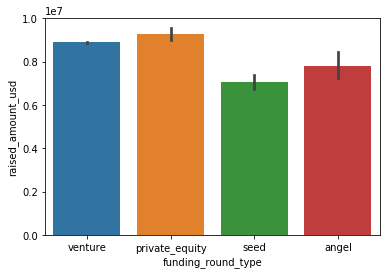

In [20]:
#Average funding across funding types
import seaborn as sns
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=recommended_funding_df)

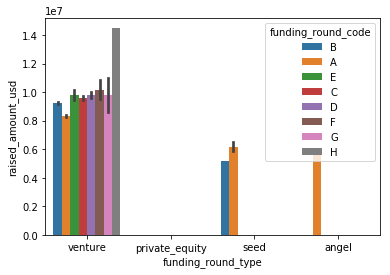

In [18]:
#Finding the distribution of funding across each funding round code under funding type against raise amount in usd
sns.barplot(x='funding_round_type', y='raised_amount_usd', hue='funding_round_code', data=recommended_funding_df, estimator=np.mean)

In [24]:
#top9 countries
venture_funding = master_frame.loc[master_frame['funding_round_type'].str.lower() == 'venture']
groupby_country = venture_funding.groupby(by=['country_code'], sort=True).sum()
sorted_groupby_country = groupby_country.sort_values(by=['raised_amount_usd'], ascending=False)
sorted_groupby_country.head()

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09


In [32]:
#Read english speaking countries
en_countries_file_path = r"C:\Anirudh\project\assignment\1_Investment_assignment_analysis\data\processed\english_speaking_countries.csv"
en_countries_df=pd.read_csv(en_countries_file_path, encoding="unicode_escape", delimiter = ",")
en_countries_df.head()

,country_name,country_code
0,Australia,AUS
1,New Zealand,NZL
2,United Kingdom,GBR
3,United States,USA
4,Antigua and Barbuda,ATG


In [43]:
filtered_en_countries = pd.DataFrame.merge(sorted_groupby_country, en_countries_df, left_on='country_code', right_on='country_code', how='inner')
#top9 data frame
top9=filtered_en_countries[:9]
top9.head()

,country_code,raised_amount_usd,country_name
0,USA,4.225108e+11,United States
1,GBR,2.024563e+10,United Kingdom
2,IND,1.439186e+10,India
3,CAN,9.583332e+09,Canada
4,SGP,2.793918e+09,Singapore


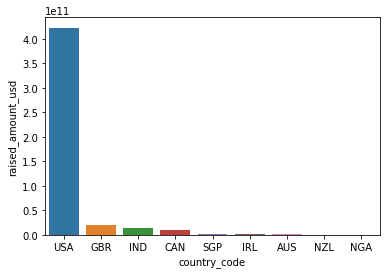

In [42]:
#graph showing investment across countries for venture type funding
sns.barplot(x='country_code', y='raised_amount_usd', data=top9)

In [44]:
#checkpoint 4:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [48]:
#Adding primary_sector column
master_frame['primary_sector'] = master_frame['category_list'].str.split(pat='|', n=0, expand=True)
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web


In [49]:
#Read mapping file
mapping_file_path = r"C:\Anirudh\project\assignment\1_Investment_assignment_analysis\data\raw\mapping.csv"
mapping_file_path=pd.read_csv(mapping_file_path, encoding="unicode_escape", delimiter = ",")
mapping_file_path.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [101]:
#Copying category list
category_list=mapping_file_path['category_list']
category_list.head()

0              NaN
1               3D
2      3D Printing
3    3D Technology
4       Accounting
Name: category_list, dtype: object

In [102]:
#Removing category_list
main_sector = mapping_file_path.drop(['category_list'], axis=1)
main_sector.head()

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1


In [103]:
main_sector_pvt = main_sector.idxmax(axis=1, skipna=False)
main_sector_pvt.head()

0                                     Blanks
1                              Manufacturing
2                              Manufacturing
3                              Manufacturing
4    Social, Finance, Analytics, Advertising
dtype: object

In [136]:
#Post transformation of data
mapping_df = pd.concat([category_list, main_sector_pvt], axis=1)
mapping_df = mapping_df.drop([0])

#mapping_df = mapping_df['category_list'].str.replace('0', 'na', regex=True)
#mapping_df = mapping_df['category_list'].str.replace('Enterprise 2.na', 'Enterprise 2.0', regex=True)
def replaceZero(str):
   # print(str[-1:])
    if(str[-1:].endswith('0')):
        return str;
    else:
        return str.replace('0', 'na')

mapping_df_refined = mapping_df['category_list'].apply(lambda x : replaceZero(x))
#mapping_df.rename(columns={'category_list':'main_sector'}, inplace=True)
#mapping_df.columns['category_list_refined']
#mapping_df_refined.head()
mapping_df.head()

,category_list,0
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,Health


In [127]:
#Combining companies, rounds and mapping file on category_list
master_frame.head()


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
